In [12]:

library(dplyr)
library(tidyr)
library(forecast)
library(expsmooth)
library(tsibble)
library(lubridate)
library(gridExtra)
library(knitr)
library(readr)
library("data.table")
library(ggplot2)
library(scales)
library(viridis)
library(tsibble)
library(lubridate)
library(fpp3)


Warning message:
"package 'fpp3' was built under R version 3.6.3"
-- Attaching packages ------------------------------------------------------------------------------------ fpp3 0.4.0 --

v tibble      3.1.1     v feasts      0.2.2
v tsibbledata 0.3.0     v fable       0.3.0

Warning message:
"package 'tibble' was built under R version 3.6.3"
Warning message:
"package 'tsibbledata' was built under R version 3.6.3"
Warning message:
"package 'fabletools' was built under R version 3.6.3"
Warning message:
"package 'fable' was built under R version 3.6.3"
-- Conflicts ----------------------------------------------------------------------------------------- fpp3_conflicts --
x data.table::between()  masks dplyr::between()
x gridExtra::combine()   masks dplyr::combine()
x lubridate::date()      masks base::date()
x dplyr::filter()        masks stats::filter()
x data.table::first()    masks dplyr::first()
x fabletools::forecast() masks forecast::forecast()
x data.table::hour()     masks lubrid

In [4]:
#reading data
df = read.csv("carbonfootprint.csv",header = TRUE)

Convert the data into time series object

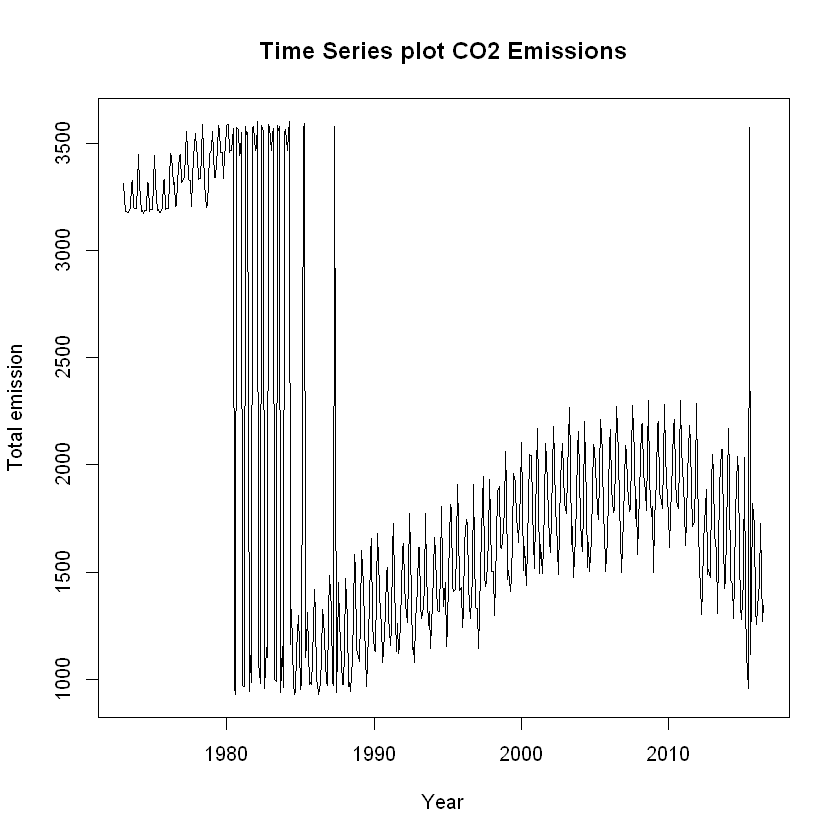

In [8]:
df_ts = ts(df$Value, start = c(1973,1), end = c(2016,7),  frequency = 12)
plot(df_ts, xlab = "Year", ylab = "Total emission", main = "Time Series plot CO2 Emissions")

Obviously the series is not stationary due to seasonality and trend.
There is changing variance across different levels of the time series, transformation such as log and box_cox to stabilize the variance would be useful here.

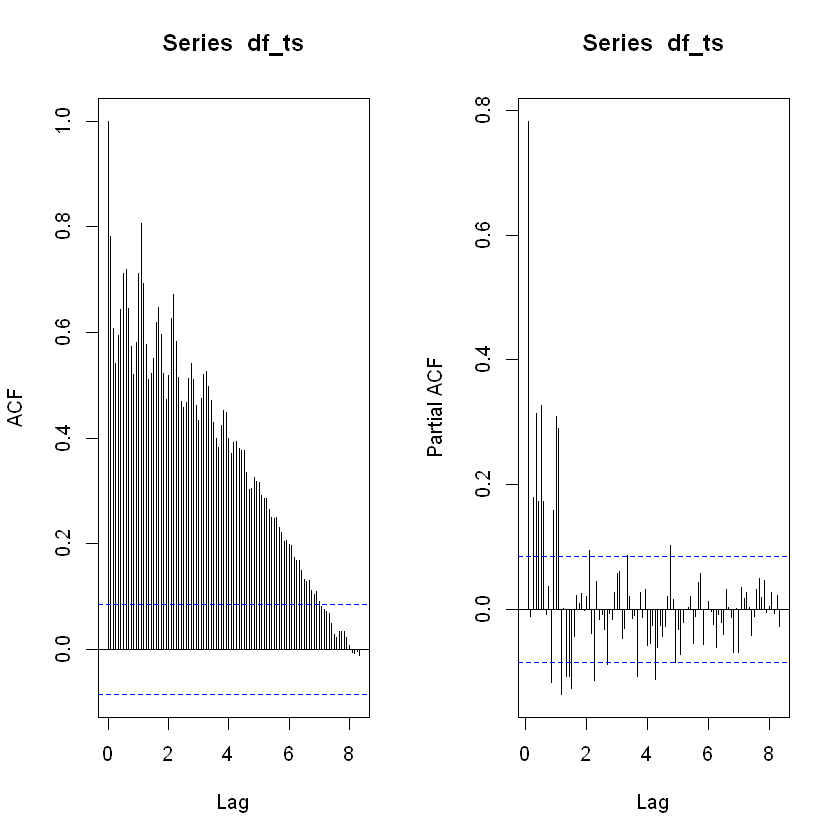

In [10]:
par(mfrow=c(1,2))
acf(df_ts, lag.max = 100)
pacf(df_ts,lag.max = 100)

Further, tthe ACF of box_cox transformed GDP does not drop very quickly to zero, moreover the value  lag 1  is large and positive, almost 1 in this case. The PACF value of lag 1 is also almost 1. All other PACF values are small. This is a sign of a non-stationary process that should be differenced in order to obtain stationary.

In this case, we can apply cox_box transformation which includes both logarithms and power transformations. 
The guerrero feature will be used to choose a value of lambda. 
It can be seen clearly that after the box_cox transformation with the value of $\lambda$ = 0.12 ,
the variation in this series appears to be mostly constant across different levels of the series.
So a transformation was useful.

In [22]:
lambda <- df %>%
  features(Value, features = guerrero) %>%
  pull(lambda_guerrero)
box_cox_emission <- df%>%
  autoplot(box_cox(Value, lambda))+
  labs(y = "", title ="Boxcox transformed Co2 Emission",
         round(lambda,2)) 

ERROR: Error in UseMethod("features"): no applicable method for 'features' applied to an object of class "data.frame"


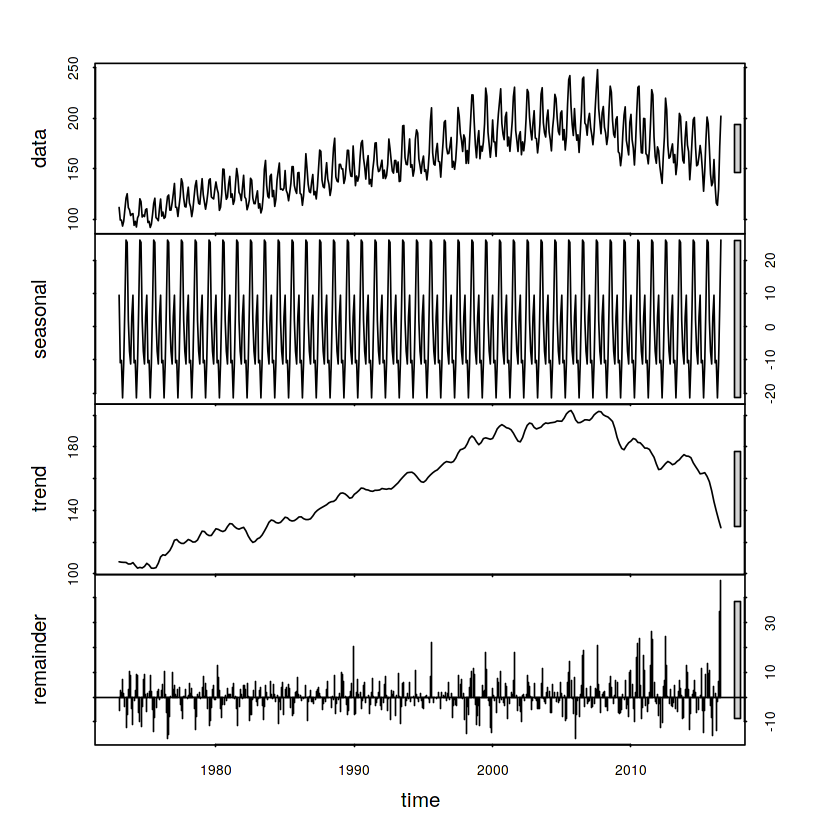

In [10]:
fit.total = stl(window(total.ts, start = c(1973,1), end = c(2016,7)), t.window = 15, s.window = "periodic", robust = TRUE)
plot(fit.total)

Decomposition of the data to see the seasonal and trend effect

**Forecasting**

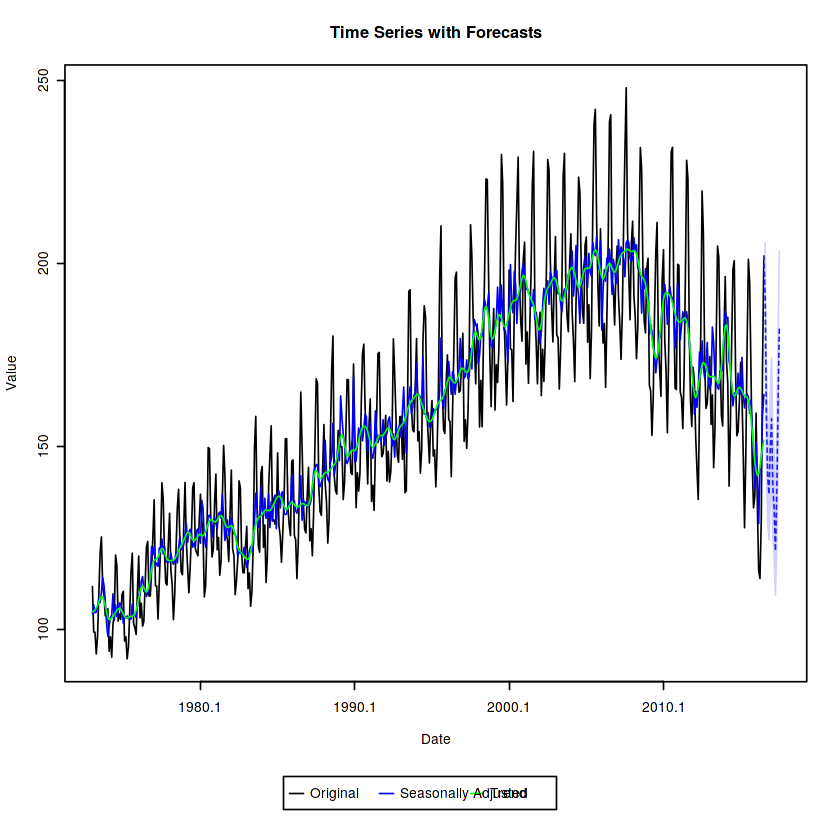

In [12]:
plot(fit.total.x12, sa=TRUE, trend=TRUE, forecast=TRUE)